In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

## Question

Why is it that when the score variance gets LARGER we get MORE confident about the MLE estimate?

## Math

Let $X_1 ,...,X_T$ be an iid sample with $X_i \sim Bernoulli(θ_0)$ with $θ_0$ being the true parameter.

The joint density/likelihood function is given by:
$$f( x ; \theta )= L ( \theta | x )= \prod_{i=1}^{T}{\theta^{x_i}(1-\theta)^{1-x_i}}=\theta^{\sum x_i}(1-\theta)^{n-\sum x_i}$$

The score function is given by:
$$ S(\theta | x)=\frac{\partial \ln L(\theta|x)}{\partial \theta}= \frac{1}{\theta}\sum x_i - \frac{1}{1-\theta}(T - \sum x_i) $$

The MLE of $θ_0$ is:
$$\hat{\theta}=\frac{1}{T}\sum_{i=1}^{T}x_i $$

And the sample Fisher Information is:
$$ I(\theta | x) = -\mathbf{E}[\frac{\partial^2 \ln L(\theta|x)}{\partial \theta^2}]$$

Evaluated at $θ_0$:
$$ I(\theta_0 | x) = T(\frac{1}{\theta_0} + \frac{1}{1-\theta_0}) $$

Then:
$$\frac{1}{\sqrt{T}}S(\theta_0|x) \xrightarrow{D} \mathcal{N}(0, \frac{I(\theta_0)}{T}) $$

and:
$$\sqrt{T}(\hat{\theta}-\theta_0) \xrightarrow{D} \mathcal{N}(0, \{\frac{I(\theta_0)}{T}\}^{-1}) $$

## Code

In [2]:
def get_score_mle(theta_true, n_data):
    """Generate a set of data and get the score at theta_true."""
    data = np.random.binomial(1, theta_true, n_data)
    data_sum = data.sum()
    data_len = float(len(data))
    theta_mle = 1./data_len * data_sum
    score_theta_true = 1/theta_true * data_sum - 1/(1-theta_true)*( data_len - data_sum)
    return score_theta_true, theta_mle

In [3]:
def run_exps(n_exp, theta_true, n_data):
    """Generate n_exp set of data and get the score at theta_true for each set."""
    res = np.empty(n_exp, dtype=float)
    for i in range(n_exp):
        score_theta_true, theta_mle = get_score_mle(theta_true, n_data)
        res[i] = score_theta_true
        fisher_info = n_data * (1./theta_true + 1./(1.-theta_true))
        if not i%1000:
            print '::: iteration %i :'%i, score_theta_true, theta_mle
    return (res, n_data, fisher_info) 

In [4]:
def plot_res(res):
    """Plot result from run_exps"""
    print '::: n_data: %i'%res[1]
    print '::: fisher info: %f'%res[2]
    score_normalized = res[0]/np.sqrt(res[1])
    print '::: var(score/sqrt(T)): %f'%score_normalized.var()
    print '::: distribution of (score/sqrt(T)):'
    _ = plt.hist(score_normalized, 100)

## Analysis

Compare the score variance for bernoulli samples with 100 and 10000 data points.

In [5]:
np.random.seed(0)
n_exp = 10000
theta_true = 0.9


res_1 = run_exps(n_exp, theta_true, n_data=10000)
        
print '-'*100
        
res_2 = run_exps(n_exp, theta_true, n_data=100)

::: iteration 0 : -22.2222222222 0.8998
::: iteration 1000 : 177.777777778 0.9016
::: iteration 2000 : -144.444444444 0.8987
::: iteration 3000 : -166.666666667 0.8985
::: iteration 4000 : 222.222222222 0.902
::: iteration 5000 : -500.0 0.8955
::: iteration 6000 : -55.5555555556 0.8995
::: iteration 7000 : -411.111111111 0.8963
::: iteration 8000 : -744.444444444 0.8933
::: iteration 9000 : 322.222222222 0.9029
----------------------------------------------------------------------------------------------------
::: iteration 0 : 33.3333333333 0.93
::: iteration 1000 : -66.6666666667 0.84
::: iteration 2000 : 22.2222222222 0.92
::: iteration 3000 : 11.1111111111 0.91
::: iteration 4000 : -1.42108547152e-14 0.9
::: iteration 5000 : -33.3333333333 0.87
::: iteration 6000 : -22.2222222222 0.88
::: iteration 7000 : -1.42108547152e-14 0.9
::: iteration 8000 : -11.1111111111 0.89
::: iteration 9000 : -55.5555555556 0.85


::: n_data: 10000
::: fisher info: 111111.111111
::: var(score/sqrt(T)): 11.148946
::: distribution of (score/sqrt(T)):


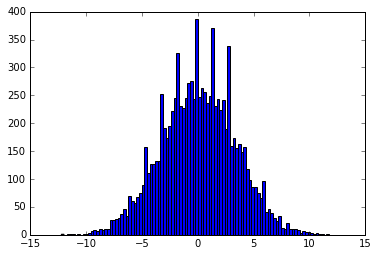

In [6]:
plot_res(res_1)

::: n_data: 100
::: fisher info: 1111.111111
::: var(score/sqrt(T)): 11.027717
::: distribution of (score/sqrt(T)):


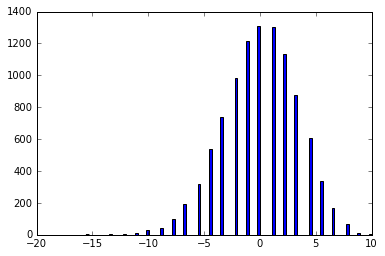

In [7]:
plot_res(res_2)

## Conclusion

* Situation 1. 

$ I(\theta_0 | x) = -\mathbf{E}[\frac{\partial^2 \ln L(\theta|x)}{\partial \theta^2}\big|_{\theta_0}] $
is large (hence variance of the mle will be small) then it means that the gradient of $\frac{\partial \ln L(\theta|x)}{\partial \theta}$ is steep. Hence even for small deviations from $\theta_0$ ,$\frac{\partial \ln L(\theta|x)}{\partial \theta}$ is likely to be far from zero. This means the mle $\hat{\theta}$ is likely to be in a close neighbourhood of $\theta_0$.

* Situation 2. 

$ I(\theta_0 | x) = -\mathbf{E}[\frac{\partial^2 \ln L(\theta|x)}{\partial \theta^2}\big|_{\theta_0}] $ is small (hence variance of the mle will be large). In this case the gradient of the likelihood $\frac{\partial \ln L(\theta|x)}{\partial \theta}$ is flatter and hence $\frac{\partial \ln L(\theta|x)}{\partial \theta}\approx 0$ for a large neighbourhood about the true parameter $\theta_0$. Therefore the mle $\hat{\theta}$ can lie in a large neighbourhood of $\theta_0$. 



## Sources

http://faculty.washington.edu/ezivot/econ583/mleLectures.pdf

https://www.stat.tamu.edu/~suhasini/teaching613/STAT613.pdf